This code was written in Google Colaboratory.

Here is the [direct link](https://colab.research.google.com/drive/1Um7lgU5-GDcyWnVL2jlFEkyeykIiScxj) to the Colaboratory.

# 0. Dependencies

## Getting the datasets

In [0]:
!git clone https://github.com/maziarraissi/PINNs

Cloning into 'PINNs'...
remote: Enumerating objects: 736, done.
remote: Total 736 (delta 0), reused 0 (delta 0), pack-reused 736
Receiving objects: 100% (736/736), 474.47 MiB | 26.34 MiB/s, done.
Resolving deltas: 100% (62/62), done.
Checking out files: 100% (561/561), done.


## Setting up modules

TeX packages

In [0]:
!sudo apt-get -qq install texlive-fonts-recommended texlive-fonts-extra dvipng

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 86.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2_all.deb ...
Unpacking fonts-lato (2.0-2) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.8-2_all.deb ...
Unpacking poppler-data (0.4.8-2

Pip modules

In [0]:
!pip install gast==0.3.3
!pip install latex
!pip install PyDvi
!pip install ghostscript
!pip install pyDOE

  Created wheel for latex: filename=latex-0.7.0-cp36-none-any.whl size=7605 sha256=9e734cf2d1a6931f8bdc6016b2cc8e324de784abd5422c2f71a58587ab833531
  Stored in directory: /root/.cache/pip/wheels/a5/00/74/5aed853dec3fbc45e9c9cf4949f664f1bd8b6f3e6def432019
  Created wheel for tempdir: filename=tempdir-0.7.1-cp36-none-any.whl size=2214 sha256=707ef19698e60a9e882837c35f4072da0dd9db5948ba21f3976d1cd9be388f29
  Stored in directory: /root/.cache/pip/wheels/7b/f2/40/6806964a69dfe3e46eff51b06a9a036af80b933479536fa295
  Created wheel for data: filename=data-0.4-cp36-none-any.whl size=7247 sha256=8db5eec3f492e8beba2f88a2cc54c22040bc1d34f382d288cbd3ec10f2082a9f
  Stored in directory: /root/.cache/pip/wheels/f6/09/e5/5afbc45fb0de471541092c7cd8b48d3483be68b1890955e6b9
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-cp36-none-any.whl size=2782 sha256=e60399b5fd418fb5b2968a637725b7eb8fc27911c3cedd9cba419025e9617532
  Stored in directory: /root/.cache/pip/wheels/05/ef/eb/27a815601fa45bbb030

In [0]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==2.2.0

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 516.2MB 31kB/s 


## Imports, config, and utils

In [0]:
import sys
import os
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
# Manually making sure the numpy random seeds are "the same" on all devices
np.random.seed(1234)
tf.random.set_seed(1234)

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks
npz = np.load('pendulum_data.npz', allow_pickle=True)
lst = npz.files

# Current state of the pendulum
# Shape of (1000,3) contains cos(theta), sin(theta), theta_dot
# getting theta values from inverse cosine of the observation space
states = npz['states'][:, 0]
# theta = [np.arccos(x) for x in states[0]]
states
# Time measurements 0.05 second interval
# Shape of (2,), [0] contains list of time, [1] contains time step
# t = npz['times']
# theta = npz['theta']

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


array([-0.66972348, -0.18611859, -0.93054407, -0.99945953, -0.43887534,
       -0.94393153,  0.04099598, -0.15406325, -0.97855032, -0.99961322,
       -0.71721061, -0.92917048, -0.23932536, -0.99584506, -0.67262181,
       -0.75591637, -0.44002113,  0.65846305, -0.73713438, -0.92302402,
       -0.99987942, -0.9856168 , -0.98924549, -0.99902213, -0.83456146,
       -0.98859131, -0.9901342 , -0.99330519, -0.99391569, -0.99392961,
       -0.99617438, -0.84645164, -0.99466989, -0.93876847, -0.99994024,
       -0.99368466, -0.82695033,  0.49655037, -0.90367021, -0.9909906 ,
       -0.88038776,  0.15078198, -0.99923598, -0.88516046, -0.99736836,
       -0.71117262, -0.95005122, -0.7750998 , -0.99079039, -0.69677709,
       -0.93067611, -0.98373064, -0.01160027, -0.95403245, -0.99794872,
       -0.45976314,  0.24694394, -0.61597698, -0.99475159,  0.56261442,
       -0.93788833,  0.70906992,  0.96965831, -0.9932513 ,  0.64038272,
        0.13041727,  0.84970917, -0.97807311,  0.48250592,  0.95

burgersutil.py

In [0]:
import scipy.io
import numpy as np
import tensorflow as tf
import time
from datetime import datetime
from pyDOE import lhs
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

# "." for Colab/VSCode, and ".." for GitHub
repoPath = os.path.join(".", "PINNs")
# repoPath = os.path.join("..", "PINNs")
utilsPath = os.path.join(repoPath, "Utilities")
dataPath = os.path.join(repoPath, "main", "Data")
appDataPath = os.path.join(repoPath, "appendix", "Data")

sys.path.insert(0, utilsPath)
from plotting import newfig, savefig

def prep_data(path, N_u=None, N_f=None, N_n=None, q=None, ub=None, lb=None, noise=0.0, idx_t_0=None, idx_t_1=None, N_0=None, N_1=None):
    # Reading external data [t is 100x1, usol is 256x100 (solution), x is 256x1]
    data = np.load('pendulum_with_time_data.npz', allow_pickle=True)

    # Extracting data 
    t = data['times'] # 1000 element long array
    theta = data['theta'] # 1000 element long array
    
    #---------------- Unnecessary ----------------#
    # Reducing unnecessary variable
    # # Keeping the 2D data for the solution data (real() is maybe to make it float by default, in case of zeroes)
    # Exact_u = np.real(data['usol']).T # T x N

    # Never entered
    # if N_n != None and q != None and ub != None and lb != None and idx_t_0 != None and idx_t_1 != None:
    #   dt = t[idx_t_1] - t[idx_t_0]
    #   idx_x = np.random.choice(Exact_u.shape[1], N_n, replace=False) 
    #   x_0 = x[idx_x,:]
    #   u_0 = Exact_u[idx_t_0:idx_t_0+1,idx_x].T
    #   u_0 = u_0 + noise*np.std(u_0)*np.random.randn(u_0.shape[0], u_0.shape[1])
        
    #   # Boudanry data
    #   x_1 = np.vstack((lb, ub))
      
    #   # Test data
    #   x_star = x
    #   u_star = Exact_u[idx_t_1,:]

    #   # Load IRK weights
    #   tmp = np.float32(np.loadtxt(os.path.join(utilsPath, "IRK_weights", "Butcher_IRK%d.txt" % (q)), ndmin = 2))
    #   IRK_weights = np.reshape(tmp[0:q**2+q], (q+1,q))
    #   IRK_times = tmp[q**2+q:]

    #   return x, t, dt, Exact_u, x_0, u_0, x_1, x_star, u_star, IRK_weights, IRK_times

    # # Meshing x and t in 2D (256,100)
    # X, T = np.meshgrid(x,t)

    # Preparing the inputs x and t (meshed as X, T) for predictions in one single array, as X_star
    # X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))

    # # Preparing the testing u_star
    # u_star = Exact_u.flatten()[:,None]
    
    # Noiseless data TODO: add support for noisy data    
    idx = np.random.choice(t.shape[0], N_u, replace=False)
    t_train = t[idx]
    theta_train = theta[idx]

    #---------------- Unnecessary ----------------#
    # if N_0 != None and N_1 != None:
    #   Exact_u = Exact_u.T
    #   idx_x = np.random.choice(Exact_u.shape[0], N_0, replace=False)
    #   x_0 = x[idx_x,:]
    #   u_0 = Exact_u[idx_x,idx_t_0][:,None]
    #   u_0 = u_0 + noise*np.std(u_0)*np.random.randn(u_0.shape[0], u_0.shape[1])
          
    #   idx_x = np.random.choice(Exact_u.shape[0], N_1, replace=False)
    #   x_1 = x[idx_x,:]
    #   u_1 = Exact_u[idx_x,idx_t_1][:,None]
    #   u_1 = u_1 + noise*np.std(u_1)*np.random.randn(u_1.shape[0], u_1.shape[1])
      
    #   dt = np.asscalar(t[idx_t_1] - t[idx_t_0])        
    #   q = int(np.ceil(0.5*np.log(np.finfo(float).eps)/np.log(dt)))

    #   # Load IRK weights
    #   tmp = np.float32(np.loadtxt(os.path.join(utilsPath, "IRK_weights", "Butcher_IRK%d.txt" % (q)), ndmin = 2))
    #   weights =  np.reshape(tmp[0:q**2+q], (q+1,q))     
    #   IRK_alpha = weights[0:-1,:]
    #   IRK_beta = weights[-1:,:] 
    #   return x_0, u_0, x_1, u_1, x, t, dt, q, Exact_u, IRK_alpha, IRK_beta

    # if N_f == None:
    #   lb = X_star.min(axis=0)
    #   ub = X_star.max(axis=0) 
    #   return x, t, X, T, Exact_u, X_star, u_star, X_u_train, u_train, ub, lb

    # Domain bounds (lowerbounds upperbounds) [x, t], which are here ([-1.0, 0.0] and [1.0, 1.0])
    lb = t.min(axis=0)
    ub = t.max(axis=0) 

    #----- Boundary conditions are no longer necessary -----#
    # # Getting the initial conditions (t=0)
    # xx1 = np.hstack((X[0:1,:].T, T[0:1,:].T))
    # uu1 = Exact_u[0:1,:].T
    # # Getting the lowest boundary conditions (x=-1) 
    # xx2 = np.hstack((X[:,0:1], T[:,0:1]))
    # uu2 = Exact_u[:,0:1]
    # # Getting the highest boundary conditions (x=1) 
    # xx3 = np.hstack((X[:,-1:], T[:,-1:]))
    # uu3 = Exact_u[:,-1:]
    # # Stacking them in multidimensional tensors for training (X_u_train is for now the continuous boundaries)
    # X_u_train = np.vstack([xx1, xx2, xx3])
    # u_train = np.vstack([uu1, uu2, uu3])

    # Generating the x and t collocation points for f, with each having a N_f size
    # We pointwise add and multiply to spread the LHS over the 2D domain
    t_f = lb + (ub-lb)*lhs(1, N_f)

    #----- Already accomplished previously -----#
    # # Generating a uniform random sample from ints between 0, and the size of x_u_train, of size N_u (initial data size) and without replacement (unique)
    # idx = np.random.choice(X_u_train.shape[0], N_u, replace=False)
    # # Getting the corresponding X_u_train (which is now scarce boundary/initial coordinates)
    # X_u_train = X_u_train[idx,:]
    # # Getting the corresponding u_train
    # u_train = u_train [idx,:]

    # x and t => replaced by one t
    # usol => replace by theta
    # X and T => unnecessary
    # Exact_u => unnecessary
    # X_star => t
    # u_star => theta
    # X_u_train => t_train
    # u_train => theta_train
    # X_f => t_f
    # ub same
    # lb same

    # Variables needed: X_f, ub, lb, X_star, u_star, X_u_train, u_train
    return t, theta, t_train, theta_train, t_f, ub, lb

class Logger(object):
  def __init__(self, frequency=10):
    print("TensorFlow version: {}".format(tf.__version__))
    print("Eager execution: {}".format(tf.executing_eagerly()))
    print("GPU-accerelated: {}".format(tf.test.is_gpu_available()))

    self.start_time = time.time()
    self.frequency = frequency

  def __get_elapsed(self):
    return datetime.fromtimestamp(time.time() - self.start_time).strftime("%M:%S")

  def __get_error_u(self):
    return self.error_fn()

  def set_error_fn(self, error_fn):
    self.error_fn = error_fn
  
  def log_train_start(self, model):
    print("\nTraining started")
    print("================")
    self.model = model
    print(self.model.summary())

  def log_train_epoch(self, epoch, loss, custom="", is_iter=False):
    if epoch % self.frequency == 0:
      print(f"{'nt_epoch' if is_iter else 'tf_epoch'} = {epoch:6d}  elapsed = {self.__get_elapsed()}  loss = {loss:.4e}  error = {self.__get_error_u():.4e}  " + custom)

  def log_train_opt(self, name):
    # print(f"tf_epoch =      0  elapsed = 00:00  loss = 2.7391e-01  error = 9.0843e-01")
    print(f"—— Starting {name} optimization ——")

  def log_train_end(self, epoch, custom=""):
    print("==================")
    print(f"Training finished (epoch {epoch}): duration = {self.__get_elapsed()}  error = {self.__get_error_u():.4e}  " + custom)

custom_lbfgs.py

In [0]:
# Adapted from https://github.com/yaroslavvb/stuff/blob/master/eager_lbfgs/eager_lbfgs.py

import tensorflow as tf
import numpy as np
import time

# Time tracking functions
global_time_list = []
global_last_time = 0
def reset_time():
  global global_time_list, global_last_time
  global_time_list = []
  global_last_time = time.perf_counter()
  
def record_time():
  global global_last_time, global_time_list
  new_time = time.perf_counter()
  global_time_list.append(new_time - global_last_time)
  global_last_time = time.perf_counter()
  #print("step: %.2f"%(global_time_list[-1]*1000))

def last_time():
  """Returns last interval records in millis."""
  global global_last_time, global_time_list
  if global_time_list:
    return 1000 * global_time_list[-1]
  else:
    return 0

def dot(a, b):
  """Dot product function since TensorFlow doesn't have one."""
  return tf.reduce_sum(a*b)

def verbose_func(s):
  print(s)

final_loss = None
times = []
def lbfgs(opfunc, x, config, state, do_verbose, log_fn):
  """port of lbfgs.lua, using TensorFlow eager mode.
  """

  if config.maxIter == 0:
    return

  global final_loss, times
  
  maxIter = config.maxIter
  maxEval = config.maxEval or maxIter*1.25
  tolFun = config.tolFun or 1e-5
  tolX = config.tolX or 1e-19
  nCorrection = config.nCorrection or 100
  lineSearch = config.lineSearch
  lineSearchOpts = config.lineSearchOptions
  learningRate = config.learningRate or 1
  isverbose = config.verbose or False

  # verbose function
  if isverbose:
    verbose = verbose_func
  else:
    verbose = lambda x: None

    # evaluate initial f(x) and df/dx
  f, g = opfunc(x)

  f_hist = [f]
  currentFuncEval = 1
  state.funcEval = state.funcEval + 1
  p = g.shape[0]

  # check optimality of initial point
  tmp1 = tf.abs(g)
  if tf.reduce_sum(tmp1) <= tolFun:
    verbose("optimality condition below tolFun")
    return x, f_hist

  # optimize for a max of maxIter iterations
  nIter = 0
  times = []
  while nIter < maxIter:
    start_time = time.time()
    
    # keep track of nb of iterations
    nIter = nIter + 1
    state.nIter = state.nIter + 1

    ############################################################
    ## compute gradient descent direction
    ############################################################
    if state.nIter == 1:
      d = -g
      old_dirs = []
      old_stps = []
      Hdiag = 1
    else:
      # do lbfgs update (update memory)
      y = g - g_old
      s = d*t
      ys = dot(y, s)
      
      if ys > 1e-10:
        # updating memory
        if len(old_dirs) == nCorrection:
          # shift history by one (limited-memory)
          del old_dirs[0]
          del old_stps[0]

        # store new direction/step
        old_dirs.append(s)
        old_stps.append(y)

        # update scale of initial Hessian approximation
        Hdiag = ys/dot(y, y)

      # compute the approximate (L-BFGS) inverse Hessian 
      # multiplied by the gradient
      k = len(old_dirs)

      # need to be accessed element-by-element, so don't re-type tensor:
      ro = [0]*nCorrection
      for i in range(k):
        ro[i] = 1/dot(old_stps[i], old_dirs[i])
        

      # iteration in L-BFGS loop collapsed to use just one buffer
      # need to be accessed element-by-element, so don't re-type tensor:
      al = [0]*nCorrection

      q = -g
      for i in range(k-1, -1, -1):
        al[i] = dot(old_dirs[i], q) * ro[i]
        q = q - al[i]*old_stps[i]

      # multiply by initial Hessian
      r = q*Hdiag
      for i in range(k):
        be_i = dot(old_stps[i], r) * ro[i]
        r += (al[i]-be_i)*old_dirs[i]
        
      d = r
      # final direction is in r/d (same object)

    g_old = g
    f_old = f
    
    ############################################################
    ## compute step length
    ############################################################
    # directional derivative
    gtd = dot(g, d)

    # check that progress can be made along that direction
    if gtd > -tolX:
      verbose("Can not make progress along direction.")
      break

    # reset initial guess for step size
    if state.nIter == 1:
      tmp1 = tf.abs(g)
      t = min(1, 1/tf.reduce_sum(tmp1))
    else:
      t = learningRate


    # optional line search: user function
    lsFuncEval = 0
    if lineSearch and isinstance(lineSearch) == types.FunctionType:
      # perform line search, using user function
      f,g,x,t,lsFuncEval = lineSearch(opfunc,x,t,d,f,g,gtd,lineSearchOpts)
      f_hist.append(f)
    else:
      # no line search, simply move with fixed-step
      x += t*d
      
      if nIter != maxIter:
        # re-evaluate function only if not in last iteration
        # the reason we do this: in a stochastic setting,
        # no use to re-evaluate that function here
        f, g = opfunc(x)
        lsFuncEval = 1
        f_hist.append(f)


    # update func eval
    currentFuncEval = currentFuncEval + lsFuncEval
    state.funcEval = state.funcEval + lsFuncEval

    ############################################################
    ## check conditions
    ############################################################
    if nIter == maxIter:
      break

    if currentFuncEval >= maxEval:
      # max nb of function evals
      verbose('max nb of function evals')
      break

    tmp1 = tf.abs(g)
    if tf.reduce_sum(tmp1) <=tolFun:
      # check optimality
      verbose('optimality condition below tolFun')
      break
    
    tmp1 = tf.abs(d*t)
    if tf.reduce_sum(tmp1) <= tolX:
      # step size below tolX
      verbose('step size below tolX')
      break

    if tf.abs(f-f_old) < tolX:
      # function value changing less than tolX
      verbose('function value changing less than tolX'+str(tf.abs(f-f_old)))
      break

    if do_verbose:
      log_fn(nIter, f.numpy(), True)
      #print("Step %3d loss %6.5f msec %6.3f"%(nIter, f.numpy(), last_time()))
      record_time()
      times.append(last_time())

    if nIter == maxIter - 1:
      final_loss = f.numpy()


  # save state
  state.old_dirs = old_dirs
  state.old_stps = old_stps
  state.Hdiag = Hdiag
  state.g_old = g_old
  state.f_old = f_old
  state.t = t
  state.d = d

  return x, f_hist, currentFuncEval

# dummy/Struct gives Lua-like struct object with 0 defaults
class dummy(object):
  pass

class Struct(dummy):
  def __getattribute__(self, key):
    if key == '__dict__':
      return super(dummy, self).__getattribute__('__dict__')
    return self.__dict__.get(key, 0)

# 1. Continuous Inference

$$u_t + u u_x - \nu u_{xx} = 0$$

With $x \in [-1,1],\quad t \in [0,1],\quad \nu = (0.01/\pi)$.

And $u(0,x) = -\sin(\pi x),\quad u(t,-1) = u(t,1) = 0$

Approximating $u(t,x)$ with a deep NN, we define the PINN:
$$f := u_t + u u_x - \nu u_{xx}.$$

We train the shared parameters between the deep NN and the PINN minimizing the loss:
$$MSE =\frac{1}{N_u}\sum_{i=1}^{N_u} |u(t^i_u,x_u^i) - u^i|^2 + \frac{1}{N_f}\sum_{i=1}^{N_f}|f(t_f^i,x_f^i)|^2,$$
with $\{t_u^i, x_u^i, u^i\}_{i=1}^{N_u}$ and $\{t_f^i, x_f^i\}_{i=1}^{N_f}$ respectively the initial/boundary data on $u(t,x)$ and collocations points for $f(t,x)$.

In [0]:
from scipy.io import loadmat
x = loadmat(os.path.join(appDataPath, "burgers_shock.mat"))
x["usol"].shape


(256, 100)

### Hyperparameters

In [0]:

# Data size on the solution u
N_u = 50
# Collocation points size, where we’ll check for f = 0
N_f = 10000
# DeepNN topology (1-sized input [t], 8 hidden layer of 20-width, 1-sized output [theta]
layers = [1, 20, 20, 20, 20, 20, 20, 20, 20, 1]
# Setting up the TF SGD-based optimizer (set tf_epochs=0 to cancel it)
tf_epochs = 200
tf_optimizer = tf.keras.optimizers.Adam(
  learning_rate=0.1,
  beta_1=0.99,
  epsilon=1e-1)
# Setting up the quasi-newton LBGFS optimizer (set nt_epochs=0 to cancel it)
nt_epochs = 2000
nt_config = Struct()
nt_config.learningRate = 0.8
nt_config.maxIter = nt_epochs
nt_config.nCorrection = 50
nt_config.tolFun = 1.0 * np.finfo(float).eps


In [0]:
# # # Getting the data
# path = 'pendulum_with_time_data.npz'
# # # x is an array of shape (256,1) with values ranging from -1 to 1
# # # t is an array of shape (100,1) with values ranging from 0 to 1 
# # # usol is 2D array of shape (256,100) with data from the burger's equation
# # # X and T are both shapes of (256,100) created by np.meshgrid
# # # Exact_u has shape of (100, 256) from transposing usol
# # # X_star hss shape of (25600, 2) created by flattening both X and T. Each array is (X,T)
# # # u_star has shape of (25600, 1) created by flattening  Exact_u
# # # X_u_train has shape of (N_u, 2) created by randomly choosing indices from X_star
# # # X_f = lb + (ub-lb)*lhs(2, N_f)  lhs=latin hypercube
# # # ub is upper bound
# # # lb is lower bound
# t, theta, t_train, theta_train, t_f, ub, lb = prep_data(path, N_u, N_f, noise=0.0)
# theta_train[:,None].shape

## PINN class

In [0]:

class PhysicsInformedNN(object):
  def __init__(self, layers, optimizer, logger, t_f, ub, lb, g=10.0, l=1.):
    # Descriptive Keras model [2, 20, …, 20, 1]
    self.u_model = tf.keras.Sequential()
    self.u_model.add(tf.keras.layers.InputLayer(input_shape=(layers[0],)))
    self.u_model.add(tf.keras.layers.Lambda(
      lambda X: 2.0*(X - lb)/(ub - lb) - 1.0))
    for width in layers[1:]:
        self.u_model.add(tf.keras.layers.Dense(
          width, activation=tf.nn.tanh,
          kernel_initializer='glorot_normal'))

    # Computing the sizes of weights/biases for future decomposition
    self.sizes_w = []
    self.sizes_b = []
    for i, width in enumerate(layers):
      if i != 1:
        self.sizes_w.append(int(width * layers[1]))
        self.sizes_b.append(int(width if i != 0 else layers[1]))

    self.g = g
    self.l = l
    self.optimizer = optimizer
    self.logger = logger

    self.dtype = tf.float32

    # Separating the collocation coordinates
    self.t_f = tf.convert_to_tensor(t_f[:, None], dtype=self.dtype)
    # self.t_f = tf.convert_to_tensor(X_f[:, 1:2], dtype=self.dtype)
    
  # Defining custom loss
  def __loss(self, theta_train, u_pred):
    f_pred = self.f_model()
    return tf.reduce_mean(tf.square(theta_train - u_pred)) + \
      tf.reduce_mean(tf.square(f_pred))

  def __grad(self, t_train, theta_train):
    with tf.GradientTape() as tape:
      loss_value = self.__loss(theta_train, self.u_model(t_train))
    return loss_value, tape.gradient(loss_value, self.__wrap_training_variables())

  def __wrap_training_variables(self):
    var = self.u_model.trainable_variables
    return var

  # The actual PINN
  def f_model(self):
    # Using the new GradientTape paradigm of TF2.0,
    # which keeps track of operations to get the gradient at runtime
    with tf.GradientTape(persistent=True) as tape:
      # Watching the two inputs we’ll need later, x and t
      tape.watch(self.t_f)
      # Packing together the inputs
      # t_f = tf.stack([self.t_f[:,0], self.t_f[:,0]], axis=1)

      # Getting the prediction
      u = self.u_model(self.t_f)
      # Deriving INSIDE the tape
      u_t = tape.gradient(u, self.t_f)
    
    # Getting the second derivative
    u_tt = tape.gradient(u_t, self.t_f)

    # Letting the tape go
    del tape

    g, l = self.get_params(numpy=True)

    # Buidling the PINNs
    return u_tt + (g/l)*np.sin(u) 

  def get_params(self, numpy=False):
    return self.g, self.l

  def get_weights(self):
    w = []
    for layer in self.u_model.layers[1:]:
      weights_biases = layer.get_weights()
      weights = weights_biases[0].flatten()
      biases = weights_biases[1]
      w.extend(weights)
      w.extend(biases)
    return tf.convert_to_tensor(w, dtype=self.dtype)

  def set_weights(self, w):
    for i, layer in enumerate(self.u_model.layers[1:]):
      start_weights = sum(self.sizes_w[:i]) + sum(self.sizes_b[:i])
      end_weights = sum(self.sizes_w[:i+1]) + sum(self.sizes_b[:i])
      weights = w[start_weights:end_weights]
      w_div = int(self.sizes_w[i] / self.sizes_b[i])
      weights = tf.reshape(weights, [w_div, self.sizes_b[i]])
      biases = w[end_weights:end_weights + self.sizes_b[i]]
      weights_biases = [weights, biases]
      layer.set_weights(weights_biases)

  def summary(self):
    return self.u_model.summary()

  # The training function
  def fit(self, t_train, theta_train, tf_epochs=5000, nt_config=Struct()):
    self.logger.log_train_start(self)

    # Creating the tensors
    t_train = tf.convert_to_tensor(t_train[:,None], dtype=self.dtype)
    theta_train = tf.convert_to_tensor(theta_train[:,None], dtype=self.dtype)

    self.logger.log_train_opt("Adam")
    for epoch in range(tf_epochs):
      # Optimization step
      loss_value, grads = self.__grad(t_train, theta_train)
      self.optimizer.apply_gradients(zip(grads, self.__wrap_training_variables()))
      self.logger.log_train_epoch(epoch, loss_value)
    
    self.logger.log_train_opt("LBFGS")
    def loss_and_flat_grad(w):
      with tf.GradientTape() as tape:
        self.set_weights(w)
        loss_value = self.__loss(theta_train, self.u_model(t_train))
      grad = tape.gradient(loss_value, self.u_model.trainable_variables)
      grad_flat = []
      for g in grad:
        grad_flat.append(tf.reshape(g, [-1]))
      grad_flat =  tf.concat(grad_flat, 0)
      return loss_value, grad_flat
    # tfp.optimizer.lbfgs_minimize(
    #   loss_and_flat_grad,
    #   initial_position=self.get_weights(),
    #   num_correction_pairs=nt_config.nCorrection,
    #   max_iterations=nt_config.maxIter,
    #   f_relative_tolerance=nt_config.tolFun,
    #   tolerance=nt_config.tolFun,
    #   parallel_iterations=6)
    lbfgs(loss_and_flat_grad,
      self.get_weights(),
      nt_config, Struct(), True,
      lambda epoch, loss, is_iter:
        self.logger.log_train_epoch(epoch, loss, "", is_iter))

    self.logger.log_train_end(tf_epochs + nt_config.maxIter)

  def predict(self, t):
    theta_pred = self.u_model(t)
    f_pred = self.f_model()
    return theta_pred, f_pred

## Training and plotting the results

In [0]:

# Getting the data
# x and t => replaced by one t
# usol => replace by theta
# X and T => unnecessary
# Exact_u => unnecessary
# X_star => t
# u_star => theta
# X_u_train => t_train
# u_train => theta_train
# X_f same
# ub same
# lb same
path = 'pendulum_with_time_data.npz'
t, theta, t_train, theta_train, X_f, ub, lb = prep_data(path, N_u, N_f, noise=0.0)

# Creating the model and training
# Variables needed: X_f, ub, lb, X_star, u_star, X_u_train, u_train
logger = Logger(frequency=10)
pinn = PhysicsInformedNN(layers, tf_optimizer, logger, X_f, ub, lb, g=10.0, l=1.)
def error():
  theta_pred, _ = pinn.predict(t)
  return np.linalg.norm(theta - theta_pred, 2) / np.linalg.norm(theta, 2)
logger.set_error_fn(error)
pinn.fit(t_train, theta_train, tf_epochs, nt_config)

# Getting the model predictions, from the same t that the predictions were previously gotten from
theta_pred, f_pred = pinn.predict(t)

TensorFlow version: 2.2.0
Eager execution: True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU-accerelated: True

Training started
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1)                 0         
_________________________________________________________________
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)    

In [0]:
theta_pred

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
        6.3 ,  6.35,

# 2. Discrete Inference

$$u_t + u u_x - \nu u_{xx} = 0$$

With $x \in [-1,1],\quad t \in [0,1],\quad \nu = (0.01/\pi)$.

And $u(0,x) = -\sin(\pi x),\quad u(t,-1) = u(t,1) = 0$

Approximating $u(t,x)$ with a deep NN, we define the PINN: (TODO)
$$f := u_t + u u_x - \nu u_{xx}.$$

We train the shared parameters between the deep NN and the PINN minimizing the loss: (TODO)
$$MSE =\frac{1}{N_u}\sum_{i=1}^{N_u} |u(t^i_u,x_u^i) - u^i|^2 + \frac{1}{N_f}\sum_{i=1}^{N_f}|f(t_f^i,x_f^i)|^2,$$
with $\{t_u^i, x_u^i, u^i\}_{i=1}^{N_u}$ and $\{t_f^i, x_f^i\}_{i=1}^{N_f}$ respectively the initial/boundary data on $u(t,x)$ and collocations points for $f(t,x)$.

### Hyperparameters

In [0]:

# Data size on initial condition on u
N_n = 250
# Number of RK stages
q = 500
# DeepNN topology (1-sized input [x], 3 hidden layer of 50-width, q+1-sized output [u_1^n(x), ..., u_{q+1}^n(x)]
layers = [1, 50, 50, 50, q + 1]
# Setting up the TF SGD-based optimizer (set tf_epochs=0 to cancel it)
tf_epochs = 200
tf_optimizer = tf.keras.optimizers.Adam(
  lr=0.001,
  beta_1=0.9,
  beta_2=0.999,
  epsilon=1e-08)
# Setting up the quasi-newton LBGFS optimizer (set nt_epochs=0 to cancel it)
nt_epochs = 1000
nt_config = Struct()
nt_config.learningRate = 0.8
nt_config.maxIter = nt_epochs
nt_config.nCorrection = 50
nt_config.tolFun = 1.0 * np.finfo(float).eps


## PINN class

In [0]:

class PhysicsInformedNN(object):
  def __init__(self, layers, optimizer, logger, dt, x_1, lb, ub, nu, q, IRK_weights, IRK_times):
    self.lb = lb
    self.ub = ub
    self.nu = nu

    self.dt = dt

    self.q = max(q,1)
    self.IRK_weights = IRK_weights
    self.IRK_times = IRK_times

    # Descriptive Keras model [2, 50, …, 50, q+1]
    self.U_1_model = tf.keras.Sequential()
    self.U_1_model.add(tf.keras.layers.InputLayer(input_shape=(layers[0],)))
    self.U_1_model.add(tf.keras.layers.Lambda(
      lambda X: 2.0*(X - lb)/(ub - lb) - 1.0))
    for width in layers[1:]:
        self.U_1_model.add(tf.keras.layers.Dense(
          width, activation=tf.nn.tanh,
          kernel_initializer='glorot_normal'))

    # Computing the sizes of weights/biases for future decomposition
    self.sizes_w = []
    self.sizes_b = []
    for i, width in enumerate(layers):
      if i != 1:
        self.sizes_w.append(int(width * layers[1]))
        self.sizes_b.append(int(width if i != 0 else layers[1]))

    self.dtype = tf.float32

    self.x_1 = tf.convert_to_tensor(x_1, dtype=self.dtype)

    self.optimizer = optimizer
    self.logger = logger

  def U_0_model(self, x):
    # Using the new GradientTape paradigm of TF2.0,
    # which keeps track of operations to get the gradient at runtime
    with tf.GradientTape(persistent=True) as tape:
      # Watching the two inputs we’ll need later, x and t
      tape.watch(x)
      tape.watch(self.dummy_x0_tf)

      # Getting the prediction, and removing the last item (q+1)
      U_1 = self.U_1_model(x) # shape=(len(x), q+1)
      U = U_1[:, :-1] # shape=(len(x), q)

      # Deriving INSIDE the tape (2-step-dummy grad technique because U is a mat)
      g_U = tape.gradient(U, x, output_gradients=self.dummy_x0_tf)
      U_x = tape.gradient(g_U, self.dummy_x0_tf)
      g_U_x = tape.gradient(U_x, x, output_gradients=self.dummy_x0_tf)
    
    # Doing the last one outside the with, to optimize performance
    # Impossible to do for the earlier grad, because they’re needed after
    U_xx = tape.gradient(g_U_x, self.dummy_x0_tf)

    # Letting the tape go
    del tape

    # Buidling the PINNs, shape = (len(x), q+1), IRK shape = (q, q+1)
    nu = self.get_params(numpy=True)
    N = U*U_x - nu*U_xx # shape=(len(x), q)
    return U_1 + self.dt*tf.matmul(N, self.IRK_weights.T)

  # Defining custom loss
  def __loss(self, u_0, u_0_pred):
    u_1_pred = self.U_1_model(self.x_1)
    return tf.reduce_sum(tf.square(u_0_pred - u_0)) + \
      tf.reduce_sum(tf.square(u_1_pred))

  def __grad(self, x_0, u_0):
    with tf.GradientTape() as tape:
      loss_value = self.__loss(u_0, self.U_0_model(x_0))
    return loss_value, tape.gradient(loss_value, self.__wrap_training_variables())

  def __wrap_training_variables(self):
    var = self.U_1_model.trainable_variables
    return var

  def get_weights(self):
    w = []
    for layer in self.U_1_model.layers[1:]:
      weights_biases = layer.get_weights()
      weights = weights_biases[0].flatten()
      biases = weights_biases[1]
      w.extend(weights)
      w.extend(biases)
    return tf.convert_to_tensor(w, dtype=self.dtype)

  def set_weights(self, w):
    for i, layer in enumerate(self.U_1_model.layers[1:]):
      start_weights = sum(self.sizes_w[:i]) + sum(self.sizes_b[:i])
      end_weights = sum(self.sizes_w[:i+1]) + sum(self.sizes_b[:i])
      weights = w[start_weights:end_weights]
      w_div = int(self.sizes_w[i] / self.sizes_b[i])
      weights = tf.reshape(weights, [w_div, self.sizes_b[i]])
      biases = w[end_weights:end_weights + self.sizes_b[i]]
      weights_biases = [weights, biases]
      layer.set_weights(weights_biases)

  def get_params(self, numpy=False):
    return self.nu

  def summary(self):
    return self.U_1_model.summary()

  # The training function
  def fit(self, x_0, u_0, tf_epochs, nt_config):
    self.logger.log_train_start(self)

    # Creating the tensors
    x_0 = tf.convert_to_tensor(x_0, dtype=self.dtype)
    u_0 = tf.convert_to_tensor(u_0, dtype=self.dtype)

    # Creating dummy tensors for the gradients
    self.dummy_x0_tf = tf.ones([x_0.shape[0], self.q], dtype=self.dtype)

    self.logger.log_train_opt("Adam")
    for epoch in range(tf_epochs):
      # Optimization step
      loss_value, grads = self.__grad(x_0, u_0)
      self.optimizer.apply_gradients(
        zip(grads, self.__wrap_training_variables()))
      self.logger.log_train_epoch(epoch, loss_value)

    self.logger.log_train_opt("LBFGS")
    def loss_and_flat_grad(w):
      with tf.GradientTape() as tape:
        self.set_weights(w)
        loss_value = self.__loss(u_0, self.U_0_model(x_0))
      grad = tape.gradient(loss_value, self.U_1_model.trainable_variables)
      grad_flat = []
      for g in grad:
        grad_flat.append(tf.reshape(g, [-1]))
      grad_flat =  tf.concat(grad_flat, 0)
      return loss_value, grad_flat
    # tfp.optimizer.lbfgs_minimize(
    #   loss_and_flat_grad,
    #   initial_position=self.get_weights(),
    #   num_correction_pairs=nt_config.nCorrection,
    #   max_iterations=nt_config.maxIter,
    #   f_relative_tolerance=nt_config.tolFun,
    #   tolerance=nt_config.tolFun,
    #   parallel_iterations=6)
    lbfgs(loss_and_flat_grad,
      self.get_weights(),
      nt_config, Struct(), True,
      lambda epoch, loss, is_iter:
        self.logger.log_train_epoch(epoch, loss, "", is_iter))
    
    self.logger.log_train_end(tf_epochs)

  def predict(self, x_star):
    u_star = self.U_1_model(x_star)[:, -1]
    return u_star

## Training and plotting the results

In [0]:

# Setup
lb = np.array([-1.0])
ub = np.array([1.0])
idx_t_0 = 10
idx_t_1 = 90
nu = 0.01/np.pi

# Getting the data
path = os.path.join(appDataPath, "burgers_shock.mat")
x, t, dt, \
  Exact_u, x_0, u_0, x_1, x_star, u_star, \
  IRK_weights, IRK_times = prep_data(path, N_n=N_n, q=q, lb=lb, ub=ub, noise=0.0, idx_t_0=idx_t_0, idx_t_1=idx_t_1)

# Creating the model and training
logger = Logger(frequency=10)
pinn = PhysicsInformedNN(layers, tf_optimizer, logger, dt, x_1, lb, ub, nu, q, IRK_weights, IRK_times)
def error():
  u_pred = pinn.predict(x_star)
  return np.linalg.norm(u_pred - u_star, 2) / np.linalg.norm(u_star, 2)
logger.set_error_fn(error)
pinn.fit(x_0, u_0, tf_epochs, nt_config)

# Getting the model predictions, from the same (x,t) that the predictions were previously gotten from
u_1_pred = pinn.predict(x_star)


# Getting the model predictions, from the same (x,t) that the predictions were previously gotten from
u_1_pred = pinn.predict(x_star)

TensorFlow version: 2.2.0
Eager execution: True
GPU-accerelated: True

Training started
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 501)               25551     
Total params: 30,751
Trainable params: 30,751
Non-trainable params: 0
_________________________________________________________________
None
—— Starting Adam optimi

No handles with labels found to put in legend.


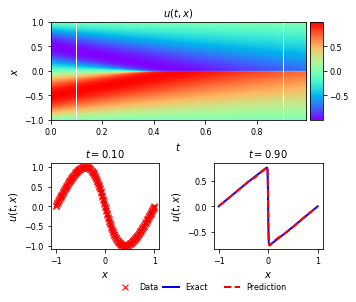

In [0]:
plot_inf_disc_results(x_star, idx_t_0, idx_t_1, x_0, u_0, ub, lb, u_1_pred, Exact_u, x, t)